# EOSC 582 Assignment VI (Cloud hist)

In [1]:
__author__ = 'Yingkai (Kyle) Sha'
__email__  = 'yingkai@eos.ubc.ca'

In [2]:
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from __future__ import print_function
% matplotlib inline

#Read HDF5 data

In [3]:
hdf_L1B=glob.glob('_data/EOSC 582 Cloud clustering/MYD021*.h5')
hdf_GEO=glob.glob('_data/EOSC 582 Cloud clustering/MYD03*.h5')
L1B_obj=h5py.File(hdf_L1B[0], 'r')
GEO_obj=h5py.File(hdf_GEO[0], 'r')

Emissivity

In [4]:
raw_emiss=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_Emissive'][:]
band_names=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_Emissive'].attrs['band_names']
radiance_scales=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_Emissive'].attrs['radiance_scales']
radiance_offsets=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_Emissive'].attrs['radiance_offsets']
band_names=np.fromstring(band_names, dtype=np.float, sep=',')
radiance_scales=np.array(radiance_scales)
radiance_offsets=np.array(radiance_offsets)

In [5]:
# channel-31
hit=band_names==31
raw_C31=raw_emiss[hit, :, :]
C31=(raw_C31 - radiance_offsets[hit] * np.ones(raw_C31.shape)) * radiance_scales[hit]

In [7]:
# channel-35, 13.785–14.085 mu m 
hit=band_names==29
raw_C29=raw_emiss[hit, :, :]
C29=(raw_C29 - radiance_offsets[hit] * np.ones(raw_C29.shape)) * radiance_scales[hit]

Aggr. 1km reflectance

In [8]:
raw_ARef=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_250_Aggr1km_RefSB'][:]
band_names=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_250_Aggr1km_RefSB'].attrs['band_names']
reflectance_scales=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_250_Aggr1km_RefSB'].attrs['reflectance_scales']
reflectance_offsets=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_250_Aggr1km_RefSB'].attrs['reflectance_offsets']
band_names=np.fromstring(band_names, dtype=np.float, sep=',')
reflectance_scales=np.array(reflectance_scales)
reflectance_offsets=np.array(reflectance_offsets)

In [9]:
# channel-1
hit=band_names==1
raw_C1=raw_ARef[hit, :, :]
C1=(raw_C1 - reflectance_offsets[hit] * np.ones(raw_C1.shape)) * reflectance_scales[hit]

1km reflectance

In [10]:
#raw_Ref=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_RefSB'][:]
#band_names=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_RefSB'].attrs['band_names']
#reflectance_scales=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_RefSB'].attrs['reflectance_scales']
#reflectance_offsets=L1B_obj['MODIS_SWATH_Type_L1B/Data Fields/EV_1KM_RefSB'].attrs['reflectance_offsets']
#reflectance_scales=np.array(reflectance_scales)
#reflectance_offsets=np.array(reflectance_offsets)

In [11]:
#band_names

In [12]:
## channel 14
#hit=6 # 13hi
#raw_C13=raw_Ref[hit, :, :]
#C13=(raw_C13 - reflectance_offsets[hit] * np.ones(raw_C13.shape)) * reflectance_scales[hit]

#Channel-31 & channel-1 histogram

create bins

In [13]:
# create bins for channel-31 
C31_bins = 100
C31_lim=[np.nanmin(C31), np.nanmax(C31)]
C31_bins=np.linspace(C31_lim[0], C31_lim[1], C31_bins, dtype=np.float)
# and channel-1
C1_bins = 150 
C1_lim=[np.nanmin(C1), np.nanmax(C1)]
C1_bins=np.linspace(C1_lim[0], C1_lim[1], C1_bins, dtype=np.float)

hist

In [14]:
y=C31.flat[:]; y_bins=C31_bins # x: C31
x=C1.flat[:]; x_bins=C1_bins # y: C1
H, y_edges, x_edges = np.histogram2d(y, x, bins=(y_bins, x_bins))
X, Y = np.meshgrid(x_edges[:-1], y_edges[:-1])

plot

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [16]:
clevs=np.arange(0, 1000+50, 50)
CMap=plt.cm.gist_ncar_r
# high clouds definition
highcloud1_C1 = np.array([0.45, 0.65]); highcloud1_C31 = np.array([1, 3])
highcloud2_C1 = np.array([0.75, 0.95]); highcloud2_C31 = np.array([1, 3])

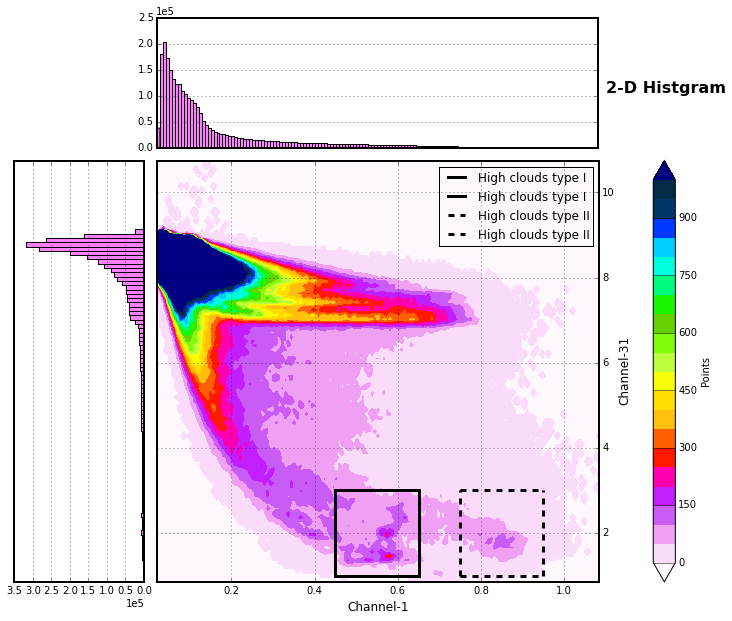

In [17]:
# set axis
left=0.1; width = 0.8; bottom=0.1; height = 0.65
gap=0.02; hist_len=0.2; cbar_len=0.12
# three boxes
rect_main  = [left+hist_len+gap, bottom, width, height]
rect_histx = [left+hist_len+gap, left+height+gap, width-cbar_len, hist_len]
rect_histy = [left, bottom, hist_len, height]
# x, y limits
xlim_bin=[np.min(X), np.max(X)]
ylim_bin=[np.min(Y), np.max(Y)]
# ========== figure ========== #
fig=plt.figure(figsize=(9, 9))
# ========== Main ========== #
# axis
axMain=plt.axes(rect_main)
axMain.yaxis.tick_right()
axMain.yaxis.set_label_position('right')
axMain.set_xlim(xlim_bin)
axMain.set_ylim(ylim_bin)
axMain.set_xlabel('Channel-1', fontsize=12)
axMain.set_ylabel('Channel-31', fontsize=12)
axMain.set_title('2-D Histgram', fontsize=16, fontweight='bold', x=1.15, y=1.15)
divider=make_axes_locatable(axMain)
# grid and frame
axMain.grid() # grid on
[i.set_linewidth(2) for i in axMain.spines.itervalues()] # a bold frame
CS=axMain.contourf(X, Y, H, clevs, cmap=CMap, extend='both') # 2-D histgram
CAx=divider.append_axes('right', size='5%', pad=0.75)
CBar=plt.colorbar(CS, cax=CAx)
CBar.set_label('Points', fontsize=10)
CBar.ax.tick_params(axis='y', length=22.5)
# show two different high clouds
x1, y1 = np.meshgrid(highcloud1_C1, highcloud1_C31)
x2, y2 = np.meshgrid(highcloud2_C1, highcloud2_C31)
axMain.plot(x1, y1, color='k', linewidth=3, label='High clouds type I')
axMain.plot(x1.T, y1.T, color='k', linewidth=3)
axMain.plot(x2, y2, color='k', linewidth=3, linestyle='--', label='High clouds type II')
axMain.plot(x2.T, y2.T, color='k', linewidth=3, linestyle='--')
axMain.legend()
# ========== Hist-x ========== #
axHistx=plt.axes(rect_histx)
axHistx.hist(x, bins=x_bins, color=[1, 0.5, 1])
axHistx.set_xlim(xlim_bin)
axHistx.axes.get_xaxis().set_visible(False)
# scientific notation for x, y-axis
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
[i.set_linewidth(2) for i in axHistx.spines.itervalues()]
axHistx.grid()
# ========== Hist-y ========== #
axHisty = plt.axes(rect_histy)
axHisty.hist(y, bins=y_bins, color=[1, 0.5, 1], orientation='horizontal')
axHisty.set_ylim(ylim_bin)
axHisty.invert_xaxis()
axHisty.axes.get_yaxis().set_visible(False)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
[i.set_linewidth(2) for i in axHisty.spines.itervalues()]
axHisty.grid()

Get the range of rectangles.

In [18]:
high_cloud1_id = ((C1 > highcloud1_C1[0]) & (C1 < highcloud1_C1[1])) & ((C31 > highcloud1_C31[0]) & (C31 < highcloud1_C31[1]))
high_cloud2_id = ((C1 > highcloud2_C1[0]) & (C1 < highcloud2_C1[1])) & ((C31 > highcloud2_C31[0]) & (C31 < highcloud2_C31[1]))

Apply the "hit" to different channels

In [19]:
cloud1_C1  = C1[high_cloud1_id]
cloud1_C31 = C31[high_cloud1_id]
cloud2_C1  = C1[high_cloud2_id]
cloud2_C31 = C31[high_cloud2_id]

cloud1_C29 = C29[high_cloud1_id] #13.9 micro band
cloud2_C29 = C29[high_cloud2_id]

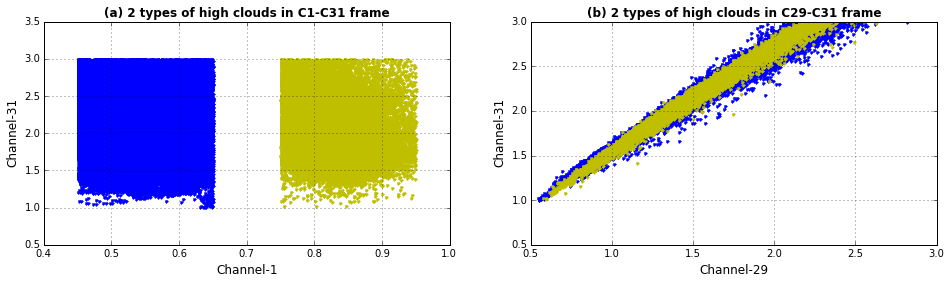

In [32]:
fig = plt.figure(figsize=(16, 4))
ax1=plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)

ax1.plot(cloud1_C1.flatten(), cloud1_C31.flatten(), 'b.')
ax1.plot(cloud2_C1.flatten(), cloud2_C31.flatten(), 'y.')
ax1.set_xlim(0.4, 1); ax1.set_ylim(0.5, 3.5); ax1.grid()
ax1.set_xlabel('Channel-1', fontsize=12); ax1.set_ylabel('Channel-31', fontsize=12)
ax1.set_title('(a) 2 types of high clouds in C1-C31 frame', fontweight='bold', fontsize=12)

ax2.plot(cloud1_C29.flatten(), cloud1_C31.flatten(), 'b.')
ax2.plot(cloud2_C29.flatten(), cloud2_C31.flatten(), 'y.')
ax2.set_xlim(0.5, 3); ax2.set_ylim(0.5, 3); ax2.grid()
ax2.set_xlabel('Channel-29', fontsize=12); ax2.set_ylabel('Channel-31', fontsize=12)
ax2.set_title('(b) 2 types of high clouds in C29-C31 frame', fontweight='bold', fontsize=12)

SyntaxError: invalid syntax (<ipython-input-29-7114597034ca>, line 1)